<a href="https://colab.research.google.com/github/Victor-Tal/Fleurys-Algorithm-Graph-Theory/blob/main/fleury.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

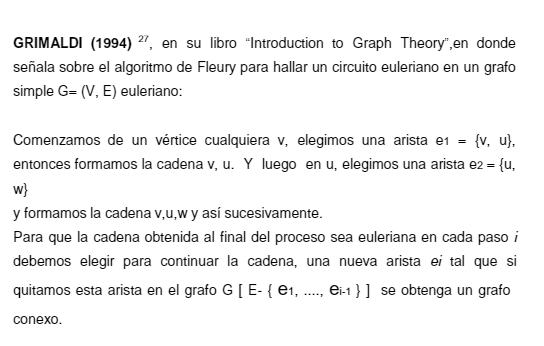

In [ ]:
from collections import defaultdict

class Grafica:
  '''
  El grafico debe tener al menos 0,2 vertices impares si no, no sera ni camino ni circuito
  
  Si tiene 0 sera un circuito Euleriano, y si tiene 2 sera un Camino Eureliano

  Comience .Fleury() en alguno de los vertices de grado cero o impar para su corrcto funcionamiento



  '''
  def __init__(self,vertices):
    self.vertice=vertices
    self.grafo= defaultdict(list)
  
  def borrarAristaas(self, i, j):  #vamos desconectando las aristas 
    jEnu = enumerate(self.grafo[j])
    iEnu = enumerate(self.grafo[i])
    for index, key in iEnu:             #Looping Through Multiple Lists
      if key == j:
        self.grafo[i].pop(index)
    for index, key in jEnu:
      if key == i:
        self.grafo[j].pop(index)

  def insertaArista(self,i ,j): #insertar arista
    self.grafo[i].append(j)
    self.grafo[j].append(i)


  def count(self, paso, j): #numero de aristas adyacentes 
    cuenta= 1
    paso[j] = True
    for index in self.grafo[j]:
      if paso[index] == False:
        cuenta = cuenta + self.count(paso, index)
    return cuenta


  def avance(self, i):
    for j in self.grafo[i]:
      if self.validar (i,j):
        print('\n', i," - ",j)
        self.borrarAristaas(i,j)
        self.avance(j)


  def validar(self, i, j):
    if len(self.grafo[i]) == 1: #caso unico vertice adyacente
      return True
    else:                        #caso verificar que los vertices adyacentes no sean puentes
      paso = [False]*(self.vertice)
      c1 = self.count(paso,i )

      self.borrarAristaas(i,j)
      paso = [False] * (self.vertice)
      c2 = self.count(paso, i)

      self.insertaArista(i,j)
      if c1 > c2: return False #si c1>c2 es un puente 
      else: return True


  def Fleury(self):
    i = 0
    for index in range(self.vertice):
      if len (self.grafo[index]) %2 !=0:
        #verifica si este vertice no es el de grado impar, ya sea 0 o 2
        i = index
        break
    if  i == 0:
      print(' El grafico debe tener al menos 0,2 vertices impares si no, no sera ni camino ni circuito')
    self.avance(i)


grafica = [(0, 1),(0, 2),(2, 3),(1, 3),(3, 4),(4, 1),(1, 5),(3, 5)]
g2 = Grafica (6)
g2.insertaArista(0, 1)
g2.insertaArista(0, 2)
g2.insertaArista(2, 3)
g2.insertaArista(1, 3)
g2.insertaArista(3, 4)
g2.insertaArista(4, 1)
g2.insertaArista(1, 5)
g2.insertaArista(3, 5)

g2.Fleury()
      

 El grafico debe tener al menos 0,2 vertices impares si no, no sera ni camino ni circuito

 0  -  1

 1  -  3

 3  -  5

 5  -  1

 1  -  4

 4  -  3

 3  -  2

 2  -  0
